**Author:** [Riccardo Guidotti](http://kdd.isti.cnr.it/people/riccardo-guidotti)  
**Python version:**  3.x

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

# Data Preparation

In [6]:
from sklearn.datasets import load_breast_cancer

frame = load_breast_cancer(as_frame=True)
df = frame['data']
X = df.values
y = np.array(frame['target'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['class'] = y

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
my_dict = {0: 'no', 1: 'yes'}

In [11]:
my_dict = {0: 'no', 1: 'yes'}
df['nome_classe'] = df['class'].map(my_dict)

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class,nome_classe
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,no
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,no
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,no
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,no
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,no


# Data Partitioning

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=100, stratify=y)

In [15]:
X_train.shape

(398, 30)

# Classification

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9590643274853801
F1-score [0.94488189 0.96744186]
              precision    recall  f1-score   support

           0      0.952     0.938     0.945        64
           1      0.963     0.972     0.967       107

    accuracy                          0.959       171
   macro avg      0.958     0.955     0.956       171
weighted avg      0.959     0.959     0.959       171



# Variance Threshold

In [33]:
np.histogram(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14e04])

(array([25,  0,  1,  0,  0,  1,  0,  0,  0,  1]),
 array([7.26695870e-06, 2.21802912e+02, 4.43605817e+02, 6.65408722e+02,
        8.87211627e+02, 1.10901453e+03, 1.33081744e+03, 1.55262034e+03,
        1.77442325e+03, 1.99622615e+03, 2.21802906e+03]))

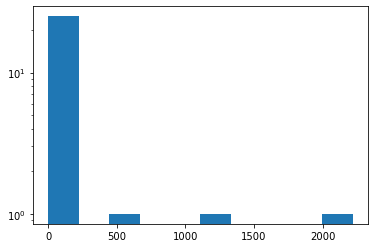

In [32]:
plt.hist(np.var(X_train, axis=0)[np.var(X_train, axis=0) < 3.14e04])
plt.yscale('log')
plt.show()

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [45]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(398, 11)

In [46]:
X_train.shape

(398, 30)

In [47]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9239766081871345
F1-score [0.9037037  0.93719807]
              precision    recall  f1-score   support

           0      0.859     0.953     0.904        64
           1      0.970     0.907     0.937       107

    accuracy                          0.924       171
   macro avg      0.915     0.930     0.920       171
weighted avg      0.929     0.924     0.925       171



# Univariate Feature Selection

In [40]:
from sklearn.feature_selection import SelectKBest

In [48]:
sel = SelectKBest(k=10)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(398, 10)

In [49]:
sel.scores_

array([4.37491405e+02, 9.10097421e+01, 4.72519446e+02, 3.85668915e+02,
       5.15754043e+01, 2.07111004e+02, 3.49035403e+02, 5.87345759e+02,
       3.61925078e+01, 4.18401135e-01, 1.60395404e+02, 1.88457000e-01,
       1.45741073e+02, 1.37905652e+02, 5.31213366e+00, 3.33208534e+01,
       1.82404689e+01, 6.13246510e+01, 6.25169366e-01, 2.22633638e+00,
       5.92014717e+02, 1.19190783e+02, 6.29319595e+02, 4.61077134e+02,
       7.61205483e+01, 2.12382507e+02, 2.84566687e+02, 6.61320409e+02,
       7.16514058e+01, 4.50393573e+01])

In [50]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9590643274853801
F1-score [0.94488189 0.96744186]
              precision    recall  f1-score   support

           0      0.952     0.938     0.945        64
           1      0.963     0.972     0.967       107

    accuracy                          0.959       171
   macro avg      0.958     0.955     0.956       171
weighted avg      0.959     0.959     0.959       171



## Select Form Model

In [51]:
from sklearn.feature_selection import SelectFromModel

In [57]:
sel = SelectFromModel(DecisionTreeClassifier())
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(398, 4)

In [55]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9590643274853801
F1-score [0.94488189 0.96744186]
              precision    recall  f1-score   support

           0      0.952     0.938     0.945        64
           1      0.963     0.972     0.967       107

    accuracy                          0.959       171
   macro avg      0.958     0.955     0.956       171
weighted avg      0.959     0.959     0.959       171



# Recursive Feature Elimination

In [61]:
from sklearn.feature_selection import RFE

In [63]:
sel = RFE(DecisionTreeClassifier(), n_features_to_select=4)
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(398, 4)

In [64]:
X_test_sel = sel.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.9532163742690059
F1-score [0.93650794 0.96296296]
              precision    recall  f1-score   support

           0      0.952     0.922     0.937        64
           1      0.954     0.972     0.963       107

    accuracy                          0.953       171
   macro avg      0.953     0.947     0.950       171
weighted avg      0.953     0.953     0.953       171



# Principal Component Analysis

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [20]:
X_train_pca.shape

(398, 2)

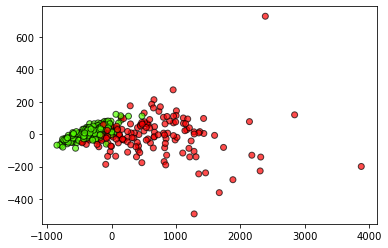

In [67]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, 
            cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [68]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9122807017543859
F1-score [0.88188976 0.93023256]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        64
           1       0.93      0.93      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



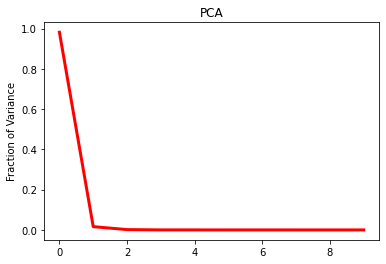

In [69]:
plt.plot(PCA(n_components=10).fit(X).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.show()

# Random Subspace Projection

In [70]:
from sklearn import random_projection

In [94]:
rsp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
X_train_rsp = rsp.fit_transform(X_train)
X_train_rsp.shape

(398, 2)

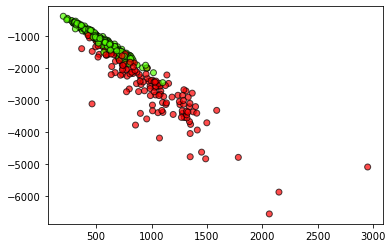

In [95]:
plt.scatter(X_train_rsp[:, 0], X_train_rsp[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [90]:
X_test_rsp = rsp.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_rsp, y_train)

y_pred = clf.predict(X_test_rsp)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8947368421052632
F1-score [0.86153846 0.91509434]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        64
           1       0.92      0.91      0.92       107

    accuracy                           0.89       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.89      0.90       171



# Multi Dimensional Scaling

In [91]:
from sklearn.manifold import MDS

In [104]:
mds = MDS(n_components=2) #, normalized_stress='auto') # shoudl run as sammon mapping
X_train_mds = mds.fit_transform(X_train)
X_train_mds.shape

(398, 2)

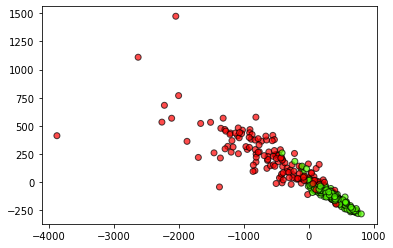

In [105]:
plt.scatter(X_train_mds[:, 0], X_train_mds[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [106]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_mds, y_train)

y_pred = clf.predict(X_train_mds)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9698492462311558
F1-score [0.96       0.97580645]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       148
           1       0.98      0.97      0.98       250

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



# IsoMap

In [107]:
from sklearn.manifold import Isomap

In [112]:
iso = Isomap(n_components=2)
X_train_iso = iso.fit_transform(X_train)
X_train_iso.shape

(398, 2)

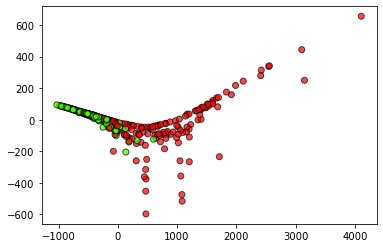

In [113]:
plt.scatter(X_train_iso[:, 0], X_train_iso[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [114]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_iso, y_train)

y_pred = clf.predict(X_train_iso)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9623115577889447
F1-score [0.94915254 0.97005988]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       148
           1       0.97      0.97      0.97       250

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



# t-SNE

In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne.shape

/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/riccardo/opt/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(398, 2)

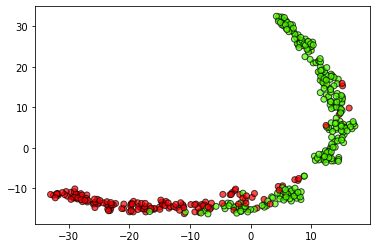

In [38]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [39]:
#X_test_mds = mds.transform(X_test) # no transform

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_tsne, y_train)

y_pred = clf.predict(X_train_tsne)

print('Accuracy %s' % accuracy_score(y_train, y_pred))
print('F1-score %s' % f1_score(y_train, y_pred, average=None))
print(classification_report(y_train, y_pred))

Accuracy 0.9597989949748744
F1-score [0.94557823 0.96812749]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       148
           1       0.96      0.97      0.97       250

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



https://jhui.github.io/2017/01/15/Machine-learning-Multi-dimensional-scaling-and-visualization/